In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from sklearn.impute import SimpleImputer # import simple imputer
from math import sqrt
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score


In [2]:
filepath = '../Data/final/Polonnaruwa_demand.csv'
data = pd.read_csv(filepath, index_col="Month",parse_dates=["Month"])
print(data.shape) 
data.head()

(84, 7)


Demand  Temp_Avg  Temp_Max  Temp_Min  Rainfall_Avg  \
Month                                                               
2015-01-01  12.418261      25.8      30.6      21.0           3.3   
2015-02-01  12.161542      25.9      30.6      21.2          57.5   
2015-03-01  12.368027      27.6      33.3      22.0          14.8   
2015-04-01  13.252103      28.5      33.6      23.5         264.2   
2015-05-01  13.522365      28.7      32.7      24.6         144.9   

            HumidityDay  HumidityNight  
Month                                   
2015-01-01         73.0            NaN  
2015-02-01         77.0            NaN  
2015-03-01         71.0            NaN  
2015-04-01         69.0            NaN  
2015-05-01         67.0            NaN

In [3]:
data.describe(include='all')

Demand   Temp_Avg   Temp_Max   Temp_Min  Rainfall_Avg  HumidityDay  \
count  84.000000  84.000000  84.000000  84.000000     84.000000    82.000000   
mean   18.832599  27.841667  32.089286  23.586905    120.180952    66.597561   
std     4.174318   1.348110   1.615439   1.567346    129.479679    10.019561   
min     6.966887  25.100000  28.500000  19.900000      0.000000    47.000000   
25%    15.766770  26.700000  30.800000  22.375000     18.250000    57.000000   
50%    19.971737  28.200000  32.100000  23.900000     75.000000    67.000000   
75%    21.791048  28.825000  33.300000  24.800000    176.650000    75.000000   
max    34.198090  30.400000  35.900000  26.700000    564.200000    84.000000   

       HumidityNight  
count            0.0  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN

In [4]:
data.isnull().sum() #return true/ false. If ture , its a missing place. If false, it contains a values.

Demand            0
Temp_Avg          0
Temp_Max          0
Temp_Min          0
Rainfall_Avg      0
HumidityDay       2
HumidityNight    84
dtype: int64

In [5]:
sample_data= data.copy()
sample_data.isnull().sum()

Demand            0
Temp_Avg          0
Temp_Max          0
Temp_Min          0
Rainfall_Avg      0
HumidityDay       2
HumidityNight    84
dtype: int64

In [6]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean') 
sample_data.HumidityDay = imputer.fit_transform(sample_data['HumidityDay'].values.reshape(-1,1))[:,0]
sample_data= sample_data.drop(columns='HumidityNight')
sample_data.isnull().sum()

Demand          0
Temp_Avg        0
Temp_Max        0
Temp_Min        0
Rainfall_Avg    0
HumidityDay     0
dtype: int64

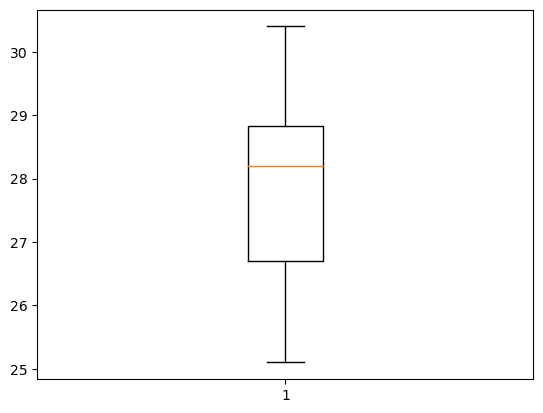

In [7]:
plt.boxplot(sample_data["Temp_Avg"])  #finding outliers
plt.show()

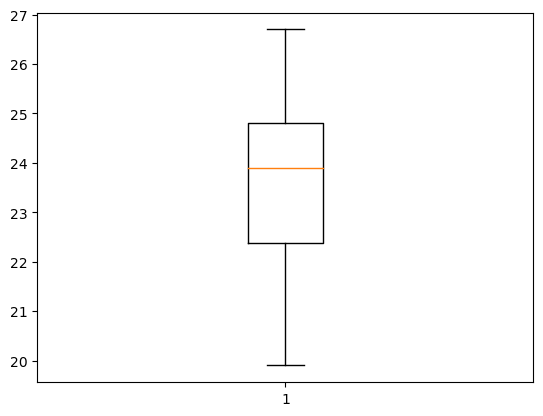

In [8]:
plt.boxplot(sample_data["Temp_Min"])  #finding outliers
plt.show()

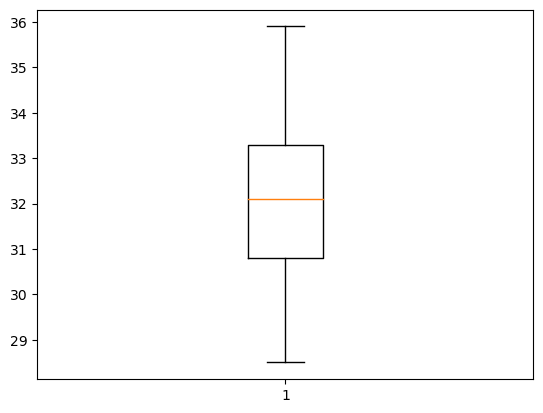

In [9]:
plt.boxplot(sample_data["Temp_Max"])  #finding outliers
plt.show()

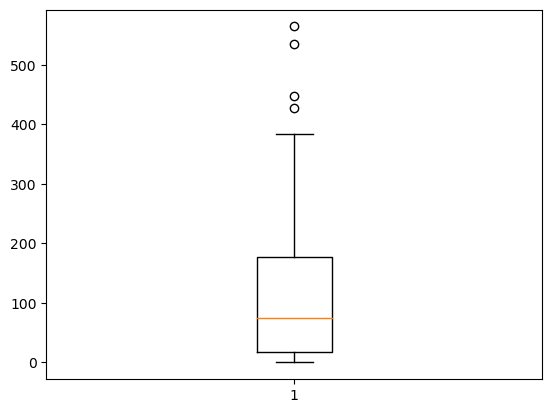

In [10]:
plt.boxplot(sample_data["Rainfall_Avg"])  #finding outliers
plt.show()

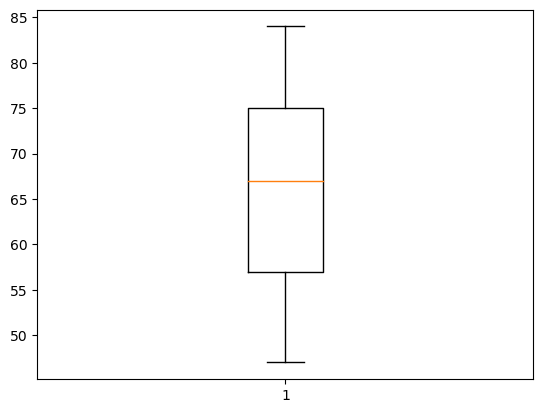

In [11]:
plt.boxplot(sample_data["HumidityDay"])  #finding outliers
plt.show()

In [14]:
# plt.boxplot(sample_data["HumidityNight"])  #finding outliers
# plt.show()

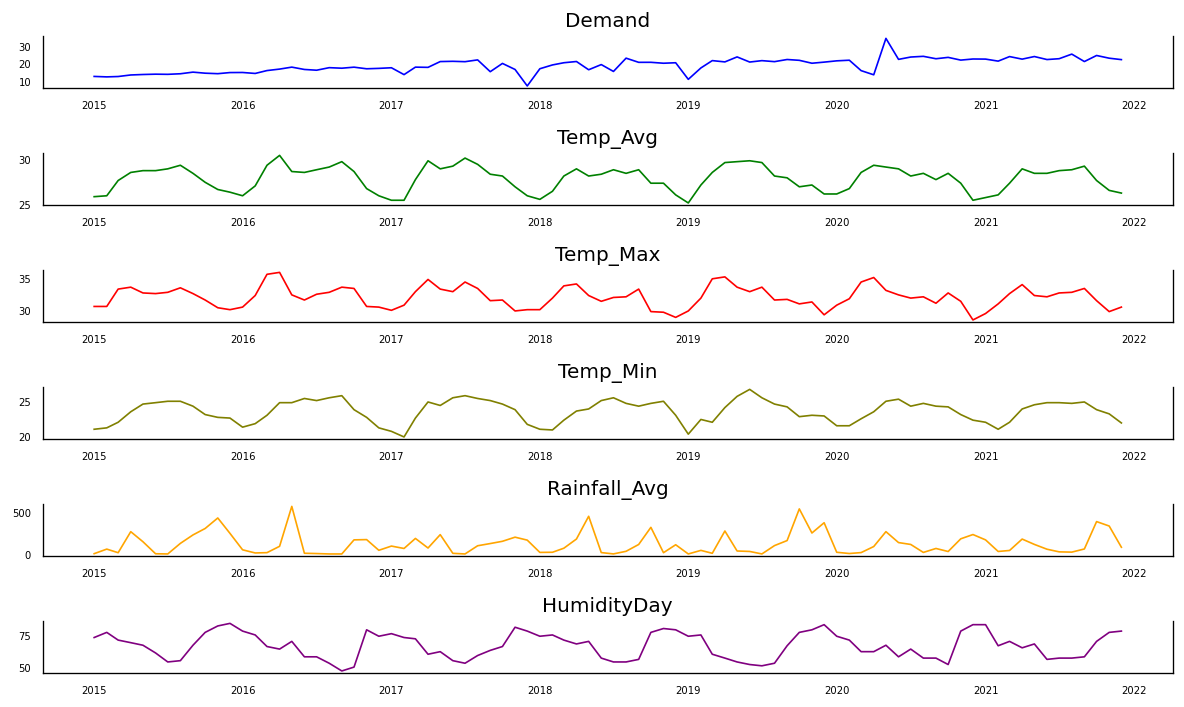

In [15]:
color_list=["blue","green","red","olive","orange","purple","brown"]

fig, axes = plt.subplots(nrows=6, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = sample_data[sample_data.columns[i]]
    ax.plot(data, color=color_list[i%(len(color_list))], linewidth=1)
    
    ax.set_title(sample_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [16]:
#check weather data stationary or not(augmented dickey-fuller test)

ad_fuller_result_1 = adfuller(sample_data['Demand'])#.diff()[1:])

print('Demand')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['Temp_Avg'])#.diff()[1:])

print('Average Temperature')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['Temp_Max'])#.diff()[1:])

print('Maximum Temperature')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['Temp_Min'])#.diff()[1:])

print('Minimum Temperature')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['Rainfall_Avg'])#.diff()[1:])

print('Average Rainfall')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['HumidityDay'])#.diff()[1:])

print('Humidity Day')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

# ad_fuller_result_2 = adfuller(sample_data['HumidityNight'])#.diff()[1:])

# print('Humidity Night')
# print(f'ADF Statistic: {ad_fuller_result_2[0]}')
# print(f'p-value: {ad_fuller_result_2[1]}')

# p value shold be , p <0.05

Demand
ADF Statistic: -2.6015667886893397
p-value: 0.09267387627415724

---------------------

Average Temperature
ADF Statistic: -2.6096329105762113
p-value: 0.09102263993750637

---------------------

Maximum Temperature
ADF Statistic: -1.8496767217312786
p-value: 0.35609210882390396

---------------------

Minimum Temperature
ADF Statistic: -2.3409307304499785
p-value: 0.15910648800474514

---------------------

Average Rainfall
ADF Statistic: -6.77437856803759
p-value: 2.5930873215028166e-09

---------------------

Humidity Day
ADF Statistic: -5.815252538356825
p-value: 4.307511523413869e-07

---------------------



In [ ]:
# do first order differencing

ad_fuller_result_1= adfuller(sample_data['Demand'].diff()[1:])

print('Demand')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['Temp_Avg'].diff()[1:])

print('Average Temperature')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['Temp_Max'].diff()[1:])

print('Maximum Temperature')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['Temp_Min'].diff()[1:])

print('Minimum Temperature')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['Rainfall_Avg'].diff()[1:])

print('Average Rainfall')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['HumidityDay'].diff()[1:])

print('Humidity Day')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['HumidityNight'].diff()[1:])

print('Humidity Night')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')


In [ ]:
sample_data.head(5)

In [17]:
# make first-order differencing 
df_transformed = sample_data.diff().dropna()
df = sample_data.iloc[1:]
print(df.shape)
df_transformed.shape
df_transformed.head()

(83, 6)


Demand  Temp_Avg  Temp_Max  Temp_Min  Rainfall_Avg  HumidityDay
Month                                                                        
2015-02-01 -0.256719       0.1       0.0       0.2          54.2          4.0
2015-03-01  0.206485       1.7       2.7       0.8         -42.7         -6.0
2015-04-01  0.884076       0.9       0.3       1.5         249.4         -2.0
2015-05-01  0.270262       0.2      -0.9       1.1        -119.3         -2.0
2015-06-01  0.185478       0.0      -0.1       0.2        -142.5         -6.0

In [18]:
#Test the Granger Causality

max_lags=6
y='Demand'

for i in range(len(df_transformed.columns)-1):
    results=grangercausalitytests(df_transformed[[y,df_transformed.columns[i+1]]],max_lags,verbose=False)
    p_values=[round(results[i+1][0]['ssr_ftest'][1],4)for i in range(max_lags)]
    print('column-{} :P_values - {}'.format(df_transformed.columns[i+1],p_values))

column-Temp_Avg :P_values - [0.0278, 0.009, 0.0095, 0.0042, 0.008, 0.0077]
column-Temp_Max :P_values - [0.0284, 0.0169, 0.0023, 0.0007, 0.003, 0.0013]
column-Temp_Min :P_values - [0.1495, 0.0824, 0.0722, 0.0465, 0.0537, 0.0514]
column-Rainfall_Avg :P_values - [0.9653, 0.954, 0.9891, 0.317, 0.5176, 0.2167]
column-HumidityDay :P_values - [0.2637, 0.0879, 0.0709, 0.0387, 0.0427, 0.0102]


In [19]:
df_input=sample_data[['Demand','Temp_Avg','HumidityDay']]

In [20]:
df_input

Demand  Temp_Avg  HumidityDay
Month                                       
2015-01-01  12.418261      25.8         73.0
2015-02-01  12.161542      25.9         77.0
2015-03-01  12.368027      27.6         71.0
2015-04-01  13.252103      28.5         69.0
2015-05-01  13.522365      28.7         67.0
...               ...       ...          ...
2021-08-01  25.189367      28.8         57.0
2021-09-01  20.936309      29.2         58.0
2021-10-01  24.405149      27.6         70.0
2021-11-01  22.855710      26.5         77.0
2021-12-01  22.039633      26.2         78.0

[84 rows x 3 columns]

In [21]:
df_train=df_input[:-12]
df_test=df_input[-12:]

In [22]:
df_train.shape

(72, 3)

In [23]:
df_test.shape

(12, 3)

In [24]:
model = VAR(df_train.diff()[1:])

C:\Users\Shani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [25]:
sorted_order=model.select_order(maxlags=16)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        7.055       7.165       1159.       7.098
1        6.904       7.342       997.3       7.074
2        6.881       7.647       977.5       7.177
3        6.926       8.021       1031.       7.350
4        6.711       8.134       844.2       7.261
5        6.234       7.986       537.0       6.911
6        5.969       8.049       427.3       6.773
7        5.748       8.157       361.4       6.680
8        5.762       8.499       394.2       6.820
9        5.562       8.628       356.5       6.748
10       5.297       8.692       312.4       6.610
11       5.253       8.976       356.6       6.693
12       5.031       9.082       360.9       6.597
13       4.754       9.133       375.3       6.447
14       4.095       8.803       300.3       5.916
15       3.509       8.546       312.6       5.457
16      1.544*      6.909*     

In [26]:
var_model = VARMAX(df_train, order=(16,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

C:\Users\Shani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shani\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     Statespace Model Results                                    
Dep. Variable:     ['Demand', 'Temp_Avg', 'HumidityDay']   No. Observations:                   72
Model:                                           VAR(16)   Log Likelihood                -494.899
                                             + intercept   AIC                           1295.798
Date:                                   Thu, 23 Feb 2023   BIC                           1644.128
Time:                                           02:24:30   HQIC                          1434.470
Sample:                                       01-01-2015                                         
                                            - 12-01-2020                                         
Covariance Type:                                     opg                                         
Ljung-Box (L1) (Q):      5.48, 18.03, 3.11   Jarque-Bera (JB):     14.62, 0.33, 1.64
Prob(Q):                  0.02, 0

In [27]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(df_train),end=len(df_train) + n_forecast-1)
predictions=predict.predicted_mean

In [28]:
predictions.columns=['Demand_predicted','Temp_Avg_predicted','HumidityDay_predicted']
predictions

Demand_predicted  Temp_Avg_predicted  HumidityDay_predicted
2021-01-01         19.250523           26.301223              74.451165
2021-02-01         18.722298           26.383615              71.114963
2021-03-01         19.365913           27.419128              66.553681
2021-04-01         19.563493           28.530536              62.311789
2021-05-01         20.396981           28.766940              61.249092
2021-06-01         21.385309           28.900019              61.652002
2021-07-01         22.203719           28.314587              63.164154
2021-08-01         20.722718           28.029219              60.990070
2021-09-01         19.495767           27.547651              61.068554
2021-10-01         20.524691           27.697065              62.350818
2021-11-01         20.800055           27.664351              67.848481
2021-12-01         19.710242           26.833072              74.836707

In [29]:
test_vs_pred=pd.concat([df_test,predictions],axis=1)
test_vs_pred

Demand  Temp_Avg  HumidityDay  Demand_predicted  \
2021-01-01  22.337164      25.7    83.000000         19.250523   
2021-02-01  21.177344      26.0    66.597561         18.722298   
2021-03-01  23.782002      27.3    70.000000         19.365913   
2021-04-01  22.317907      28.9    65.000000         19.563493   
2021-05-01  23.807025      28.4    68.000000         20.396981   
2021-06-01  22.082183      28.4    56.000000         21.385309   
2021-07-01  22.565923      28.7    57.000000         22.203719   
2021-08-01  25.189367      28.8    57.000000         20.722718   
2021-09-01  20.936309      29.2    58.000000         19.495767   
2021-10-01  24.405149      27.6    70.000000         20.524691   
2021-11-01  22.855710      26.5    77.000000         20.800055   
2021-12-01  22.039633      26.2    78.000000         19.710242   

            Temp_Avg_predicted  HumidityDay_predicted  
2021-01-01           26.301223              74.451165  
2021-02-01           26.383615              71.114963  
2021-03-01           27.419128              66.553681  
2021-04-01           28.530536              62.311789  
2021-05-01           28.766940              61.249092  
2021-06-01           28.900019              61.652002  
2021-07-01           28.314587              63.164154  
2021-08-01           28.029219              60.990070  
2021-09-01           27.547651              61.068554  
2021-10-01           27.697065              62.350818  
2021-11-01           27.664351              67.848481  
2021-12-01           26.833072              74.836707

<AxesSubplot:>

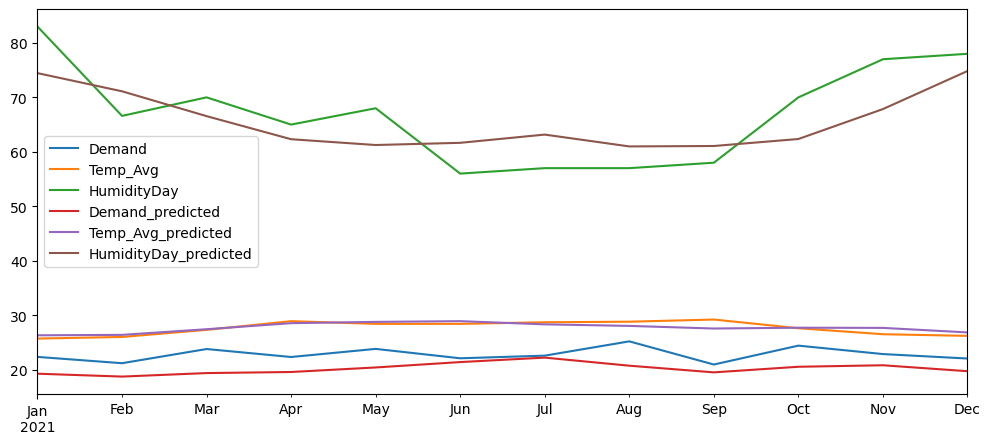

In [30]:
test_vs_pred.plot(figsize=(12,5))

In [31]:
Mean_Square_Error=mean_squared_error(df_test,predictions,multioutput='uniform_average')
print(Mean_Square_Error)

14.267230419128708


In [32]:
Root_Mean_Square_Error=sqrt(mean_squared_error(df_test,predictions))
print(Root_Mean_Square_Error)

3.7771987529290416


In [33]:
Mean_Absolute_Error=mean_absolute_error(df_test,predictions)
print(Mean_Absolute_Error)

2.866329896536296


In [34]:
R2_Error=r2_score(df_test,predictions,multioutput='variance_weighted')
print(R2_Error)

0.4521417657073097
